# About Dataset
This dataset contains exam scores and grant statuses of students who applied for Erasmus program at a university. Data can be used to analyze performance of students from different faculties and departments, or to create a model that determines whether a student from a faculty with a certain score can receive a grant.

VARIABLES
INDEX: Unique index number of each record.
COUNTRIES: Countries to be attended under Erasmus programme
UNIVERSITIES: Universities to be attended under the Erasmus programme
FACULTIES: Faculties where the students are enrolled
DEPARTMENTS: Departments where the students are enrolled
EXAM SCORE: Students' Erasmus exam scores
GRANT: Column indicating whether the students received a grant (1: received, 0: not received)
Note:
Each faculty has own quota. This means that a student scoring 80 in a faculty may not receive a grant, while a student scoring 80 in another faculty may receive grant. This should be taken into account as it may affect model you create.

Usage:
This dataset can be used for various analyses, such as:

Performance comparisons between faculties/departments.
Analysis of average exam scores by faculties/departments.
Analysis of faculties' quotas and exam scores.
Analysis of universities' quotas and faculty/department data.
Analysis of universities' countries and faculties/departments distributions.
Additionally, with this dataset, models can be created such as to determine whether a student will receive grant based on specified values.

In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to build model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# to build model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# to supress warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# reading files
data=pd.read_csv("erasmus.csv")
df=data.copy()
df

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
...,...,...,...,...,...,...,...
336,337,DUTCH,UNIVERSITEIT MAASTRICHT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13,0
337,338,POLAND,KUJAWSKO - POMORSKA SZKOLA WYZSZA W BYDGOSZCZY,FACULTY OF ENGINEERING,CIVIL ENGINEERING,61.63,0
338,339,BELGIUM,HOGESCHOOL GENT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,INTERNATIONAL FINANCE,59.93,0
339,340,DUTCH,STİCHTİNG HANZEHOGESCHOOL GRONİNGEN,FACULTY OF COMMUNICATION,ADVERTISING DESIGN AND COMMUNICATION,56.58,0


In [5]:
# checking shape of data
df.shape

(341, 7)

- there are 341 rows and 7 columns

In [7]:
# checking datatype of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


- COUNTRIES ,UNIVERSITIES ,FACULTIES ,DEPARTMENTS is object and exam_score and grant feature is int and float.

In [9]:
# checking statical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INDEX,341.0,171.000000,98.582453,1.0,86.00,171.0,256.00,341.0
EXAM SCORE,341.0,79.138944,8.565175,51.4,73.57,79.3,85.28,98.5
GRANT,341.0,0.434018,0.496356,0.0,0.00,0.0,1.00,1.0


- we dont need index .will drop it later.
- average exam_score is 79 ,min is 51.4 and maximum is 98.5.
- 43% student recieve grant. 

In [11]:
# checking categorical
df.describe(exclude=np.number).T

,count,unique,top,freq
COUNTRIES,341,22,GERMAN,67
UNIVERSITIES,341,132,STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM,13
FACULTIES,341,13,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,73
DEPARTMENTS,339,56,COMPUTER ENGINEERING,25


- there are 22 unique contries.german is top 67 times.
  

In [13]:
# checking duplicates
df.duplicated().sum()

0

- there is no duplicates in dataset

In [15]:
# checking null values
df.isna().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64

- there are 2 missing values in Department.

# EDA

In [18]:
# checking features of dataframe
df.columns

Index(['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS',
       'EXAM SCORE', 'GRANT'],
      dtype='object')

In [19]:
# copying data
df1=df.copy()

In [20]:
# Checking values of all features in one go
for column in df1.columns:
    print(df1[column].value_counts())
    print("#" * 50)
    


INDEX
1      1
226    1
234    1
233    1
232    1
      ..
113    1
112    1
111    1
110    1
341    1
Name: count, Length: 341, dtype: int64
##################################################
COUNTRIES
GERMAN            67
DUTCH             63
POLAND            45
SPAIN             26
ITALIA            24
FRANCE            24
BELGIUM           13
AUSTRIA           13
HUNGARY           11
ROMANIA           10
PORTUGUESE         7
LITHUANIA          7
GREECE             5
DENMARK            5
CZECH REPUBLIC     4
SLOVENIA           3
SWEDISH            3
IRELAND            3
FINLAND            3
CROATIA            3
BULGARIA           1
NORWAY             1
Name: count, dtype: int64
##################################################
UNIVERSITIES
STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM    13
STİCHTİNG HOGESCHOOL UTRECHT                    12
STİCHTİNG HANZEHOGESCHOOL GRONİNGEN             10
UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA       8
FUNDACIO UNIVERSITARIA BALMES          

In [21]:
# Checking university 
df1.UNIVERSITIES.unique()

array(['UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA',
       'ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA',
       'UNIVERSITAET BIELEFELD',
       'HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG',
       'UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA ',
       "INSTITUT D'ETUDES POLITIQUES D'AIX-EN-PROVENCE ",
       'OULUN YLIOPISTO',
       'ETHNIKO KAI KAPODISTRIAKO PANEPISTIMIO ATHINON ',
       'UNIVERSIDAD AUTONOMA DE BARCELONA', 'UNIVERSITY OF LIMERICK',
       'UNIVERSITAT DE BARCELONA',
       'LIBERA UNIVERSITA DI LINGUE E COMUNICAZIONE IULM',
       'STİCHTİNG HOGESCHOOL UTRECHT',
       'ETHNIKO KAI KAPODISTRIAKO PANEPISTIMIO ATHINON',
       'HOGESCHOOL GENT',
       "INSTITUT D'ETUDES POLITIQUES D'AIX-EN-PROVENCE",
       'UNIVERSIDAD DE LA IGLESIA DE DEUSTO ENTIDAD RELIGIOSA',
       'HOCHSCHULE BREMEN', 'STİCHTİNG HANZEHOGESCHOOL GRONİNGEN',
       'ESNE - ESTUDIOS SUPERIORES INTERNACIONALES',
       'STICHTING HOGER ONDERWIJS NEDERLAND',
       'SOFIA UNIVERSITY ST KLI

- there are so many universities in our dataset.will drop in later

#### COUNTRIES

In [24]:
df1.groupby("COUNTRIES")["UNIVERSITIES"].value_counts()


COUNTRIES  UNIVERSITIES                              
AUSTRIA    UNIVERSITAET GRAZ                             5
           UNIVERSITAET INNSBRUCK                        3
           UNIVERSITAET KLAGENFURT                       3
           FACHHOCHSCHULE DES BFI WIEN GMBH              1
           FH OO STUDIENBETRIEBS GMBH                    1
                                                        ..
SPAIN      UNIVERSITAT DE BARCELONA                      1
           UNIVERSIDAD AUTONOMA DE MADRID                1
           UNIVERSIDAD AUTONOMA DE BARCELONA             1
           ESNE - ESTUDIOS SUPERIORES INTERNACIONALES    1
SWEDISH    UMEA UNIVERSITET                              3
Name: count, Length: 132, dtype: int64

- most of the university from austria followed by spain and swedish.

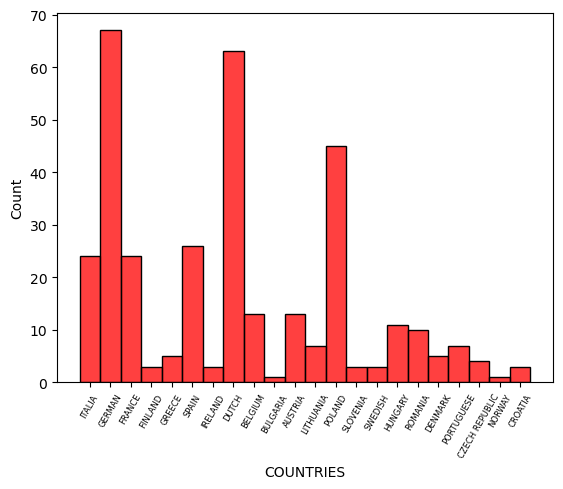

In [26]:
# checking country feature
plt.xticks(rotation=60, fontsize=6)
sns.histplot(df1,x="COUNTRIES",color="r");

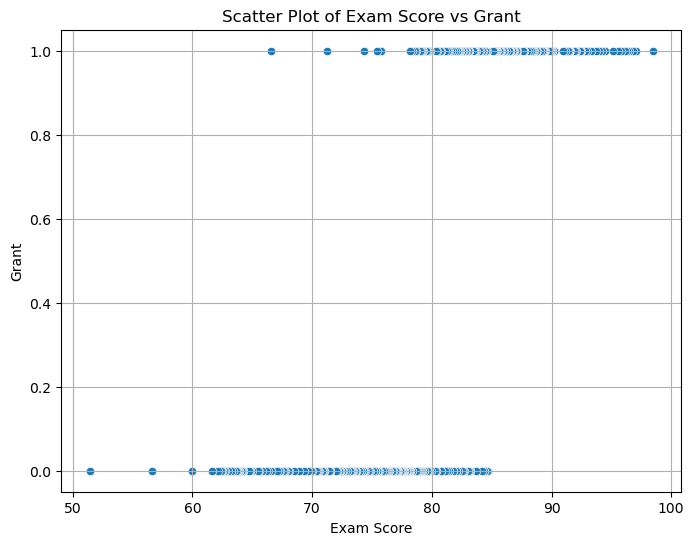

In [27]:

plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=df1, x="EXAM SCORE", y="GRANT")
plt.title('Scatter Plot of Exam Score vs Grant')
plt.xlabel('Exam Score')
plt.ylabel('Grant')
plt.grid(True)
plt.show()

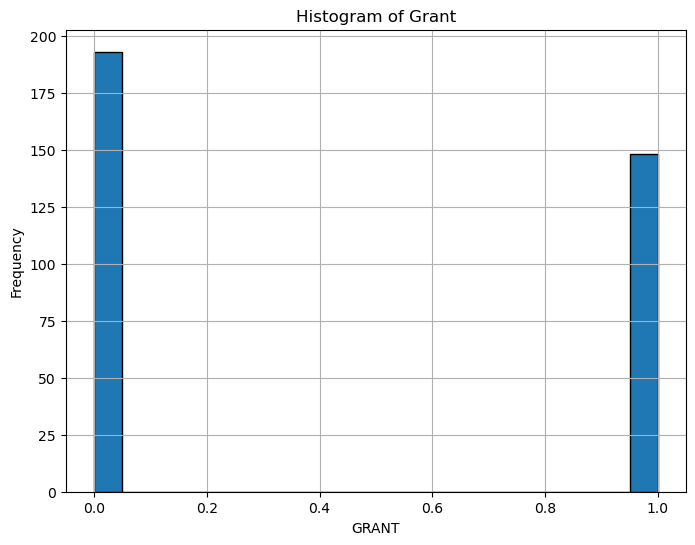

In [28]:
plt.figure(figsize=(8, 6)) 
df1['GRANT'].plot(kind='hist', bins=20, edgecolor='black')  
plt.title('Histogram of Grant')
plt.xlabel('GRANT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

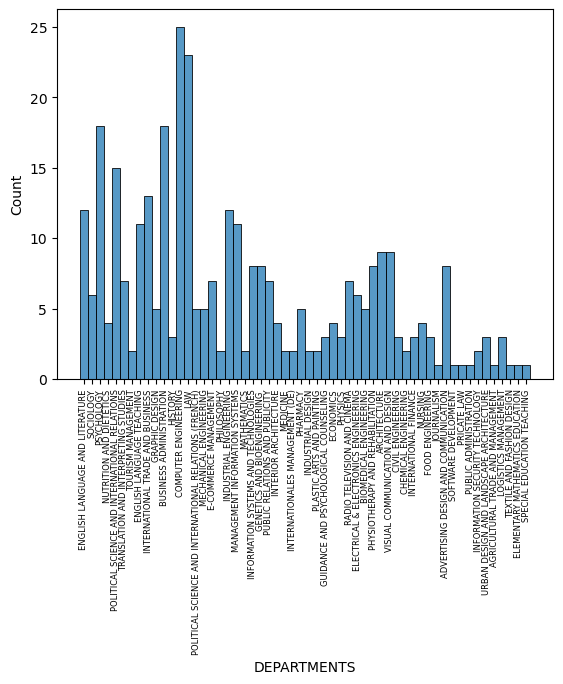

In [29]:
# checking department feature 

plt.xticks(rotation=90,fontsize=6)
sns.histplot(df1,x="DEPARTMENTS");

In [30]:
# copying data
df2=df1.copy()

## Data Preprocessing

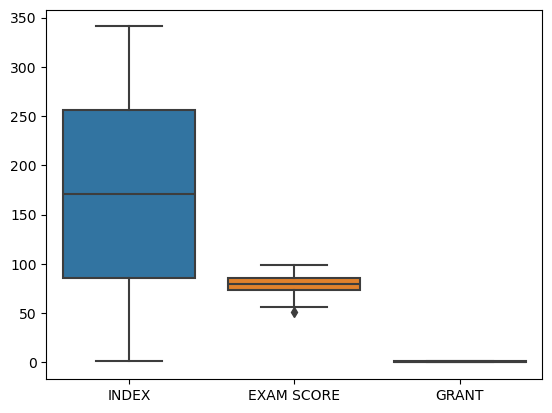

In [32]:
# checking outlier
# num_df=df2.select_dtypes(include=np.number)
# for i in df2:
sns.boxplot(df2);
    
    
    

- there is no huge outlier present in dataset.

In [34]:
#checking outlier of dataset
num_df=df2.select_dtypes(include=np.number)
num_df.corr()

,INDEX,EXAM SCORE,GRANT
INDEX,1.000000,-0.982521,-0.763065
EXAM SCORE,-0.982521,1.000000,0.720069
GRANT,-0.763065,0.720069,1.000000


- exam score and grant eature is strongly coreleated with each other.

In [36]:

# Impute missing values with the mode (most frequent value)
mode_departments = df2['DEPARTMENTS'].mode()[0]
df2['DEPARTMENTS'].fillna(mode_departments, inplace=True)


In [37]:
df2.isna().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     0
EXAM SCORE      0
GRANT           0
dtype: int64

- missing value has been imputed.

In [39]:
# removing extra features
df2 = df2.drop(["INDEX", "UNIVERSITIES"], axis=1)



In [40]:
# Droping into X and y
X=df2.drop("GRANT",axis=1)
y=df2["GRANT"]
# creating one hote encoding
X=pd.get_dummies(X,columns=["COUNTRIES","FACULTIES","DEPARTMENTS",])


In [41]:
# Define a dictionary to map True/False to 1/0
t_p = {True: 1, False: 0}

# Use replace to map boolean values to integers
X = X.replace(t_p)

In [42]:
X.shape,y.shape

((341, 92), (341,))

#### Spliting data

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (272, 92)
X_test shape: (69, 92)
y_train shape: (272,)
y_test shape: (69,)


In [45]:
# checking cross validation
# Initialize classifiers
dt_classifier = DecisionTreeClassifier()
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
gb_classifier = GradientBoostingClassifier()
lr_classifier = LogisticRegression()

# List of classifiers
classifiers = [dt_classifier, ada_classifier, gb_classifier, lr_classifier]
classifier_names = ['Decision Tree', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression']

# Perform cross-validation for each classifier
for classifier, name in zip(classifiers, classifier_names):
    scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation
    print(f'{name} Accuracy: {scores.mean():.4f} (±{scores.std():.4f})')


Decision Tree Accuracy: 0.7458 (±0.2047)
AdaBoost Accuracy: 0.7193 (±0.1905)
Gradient Boosting Accuracy: 0.7193 (±0.1914)
Logistic Regression Accuracy: 0.8248 (±0.1456)


- lets tune logistic regression.

In [47]:
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Assuming model.predict(X_train) gives the predicted labels
y_pred = model.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
precision=precision_score(y_train,y_pred)
recall=recall_score(y_train,y_pred)
f1=f1_score(y_train,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.9596
Precision: 0.9643
recall: 0.9391
f1: 0.9515


- we get 95% of accuracy,96% precision,93% recall,f1_score is 95%
- lets check it into test set

In [50]:
# Assuming model.predict(X_test) gives the predicted labels
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.8986
Precision: 0.9333
recall: 0.8485
f1: 0.8889


- model is overfit
- lets check other model.

In [52]:
# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [53]:
# Assuming model.predict(X_test) gives the predicted labels
y_pred = gb_clf.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
precision=precision_score(y_train,y_pred)
recall=recall_score(y_train,y_pred)
f1=f1_score(y_train,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 1.0000
Precision: 1.0000
recall: 1.0000
f1: 1.0000


In [54]:
# Assuming model.predict(X_test) gives the predicted labels
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.9565
Precision: 0.9688
recall: 0.9394
f1: 0.9538


In [55]:
# Initialize GradientBoostingClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,random_state=42)

# Train the model
ada.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [56]:
# Assuming model.predict(X_test) gives the predicted labels
y_pred = ada.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
precision=precision_score(y_train,y_pred)
recall=recall_score(y_train,y_pred)
f1=f1_score(y_train,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 1.0000
Precision: 1.0000
recall: 1.0000
f1: 1.0000


In [100]:
# Assuming model.predict(X_test) gives the predicted labels
y_pred = ada.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.9420
Precision: 0.9394
recall: 0.9394
f1: 0.9394


#### lets regulize model

In [134]:
# Initialize LogisticRegression with L1 or L2 regularization
log_reg = LogisticRegression(penalty='l2', C=0.15, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.15, random_state=42)

In [136]:
# Assuming model.predict(X_test) gives the predicted labels
y_pred = log_reg.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
precision=precision_score(y_train,y_pred)
recall=recall_score(y_train,y_pred)
f1=f1_score(y_train,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.9191
Precision: 0.9189
recall: 0.8870
f1: 0.9027


In [138]:
# Assuming model.predict(X_test) gives the predicted labels
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.8986
Precision: 0.8824
recall: 0.9091
f1: 0.8955


- model is not overfit .now log_reg model is generalized model.

In [141]:
# check feature important
# Get feature importance (coefficients)
feature_importance = log_reg.coef_[0]

# Pair feature names with coefficients
feature_names = list(X.columns)
coefficients = dict(zip(feature_names, feature_importance))

# Print feature importance
print("Feature Importance:")
for feature, coef in sorted(coefficients.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{feature}: {coef:.4f}")


Feature Importance:
FACULTIES_FACULTY OF ARTS AND SCIENCES: -0.7307
FACULTIES_FACULTY OF ENGINEERING: -0.6776
EXAM SCORE: 0.4837
FACULTIES_FACULTY OF LAW: 0.4171
DEPARTMENTS_LAW: 0.4171
DEPARTMENTS_COMPUTER ENGINEERING: -0.4131
DEPARTMENTS_PSYCHOLOGY: -0.3420
FACULTIES_FACULTY OF COMMUNICATION: 0.3414
FACULTIES_FACULTY OF PHARMACY: 0.2812
DEPARTMENTS_PHARMACY: 0.2812
COUNTRIES_POLAND: 0.2190
FACULTIES_GRADUATE SCHOOL OF SOCIAL SCIENCES: 0.1987
COUNTRIES_DUTCH: -0.1968
COUNTRIES_FRANCE: -0.1956
COUNTRIES_LITHUANIA: 0.1936
COUNTRIES_SPAIN: 0.1879
DEPARTMENTS_TEXTILE AND FASHION DESIGN: 0.1502
COUNTRIES_ROMANIA: -0.1475
COUNTRIES_BELGIUM: 0.1464
COUNTRIES_GERMAN: -0.1405
DEPARTMENTS_RADIO TELEVISION AND CINEMA: 0.1341
DEPARTMENTS_SOCIOLOGY: -0.1292
DEPARTMENTS_PRICATE LAW: 0.1288
DEPARTMENTS_INFORMATION SYSTEMS AND TECHNOLOGIES: 0.1225
DEPARTMENTS_PLASTIC ARTS AND PAINTING: -0.1196
DEPARTMENTS_NUTRITION AND DIETETICS: 0.1172
COUNTRIES_DENMARK: -0.1052
COUNTRIES_SWEDISH: -0.1023
DEPARTMENT

- most of the important feature is FACULTIES_FACULTY OF ARTS AND SCIENCES followed by FACULTIES_FACULTY OF ENGINEERING and exam score.